In [108]:
import pandas as pd

url = 'https://raw.githubusercontent.com/alura-cursos/reducao-dimensionalidade/master/data-set/exames.csv'

df = pd.read_csv(url)
df.head(5)

,id,diagnostico,exame_1,exame_2,exame_3,exame_4,exame_5,exame_6,exame_7,exame_8,...,exame_24,exame_25,exame_26,exame_27,exame_28,exame_29,exame_30,exame_31,exame_32,exame_33
0,842302,M,17.99,10.38,122.80,103.78,1001.0,0.11840,0.27760,0.3001,...,184.60,2019.0,0.1622,0.6656,0.7119,0.786,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,103.78,1326.0,0.08474,0.07864,0.0869,...,158.80,1956.0,0.1238,0.1866,0.2416,0.786,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,103.78,1203.0,0.10960,0.15990,0.1974,...,152.50,1709.0,0.1444,0.4245,0.4504,0.786,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,103.78,386.1,0.14250,0.28390,0.2414,...,98.87,567.7,0.2098,0.8663,0.6869,0.786,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,103.78,1297.0,0.10030,0.13280,0.1980,...,152.20,1575.0,0.1374,0.2050,0.4000,0.786,0.1625,0.2364,0.07678,0.854454


# Understanding the data



In [109]:
df.shape

(569, 35)

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 35 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           569 non-null    int64  
 1   diagnostico  569 non-null    object 
 2   exame_1      569 non-null    float64
 3   exame_2      569 non-null    float64
 4   exame_3      569 non-null    float64
 5   exame_4      569 non-null    float64
 6   exame_5      569 non-null    float64
 7   exame_6      569 non-null    float64
 8   exame_7      569 non-null    float64
 9   exame_8      569 non-null    float64
 10  exame_9      569 non-null    float64
 11  exame_10     569 non-null    float64
 12  exame_11     569 non-null    float64
 13  exame_12     569 non-null    float64
 14  exame_13     569 non-null    float64
 15  exame_14     569 non-null    float64
 16  exame_15     569 non-null    float64
 17  exame_16     569 non-null    float64
 18  exame_17     569 non-null    float64
 19  exame_18

# Data cleansing

In [111]:
df.isnull().sum()

id               0
diagnostico      0
exame_1          0
exame_2          0
exame_3          0
exame_4          0
exame_5          0
exame_6          0
exame_7          0
exame_8          0
exame_9          0
exame_10         0
exame_11         0
exame_12         0
exame_13         0
exame_14         0
exame_15         0
exame_16         0
exame_17         0
exame_18         0
exame_19         0
exame_20         0
exame_21         0
exame_22         0
exame_23         0
exame_24         0
exame_25         0
exame_26         0
exame_27         0
exame_28         0
exame_29         0
exame_30         0
exame_31         0
exame_32         0
exame_33       419
dtype: int64

In [112]:
pctg_vazios_exame_33 = round(df['exame_33'].isnull().sum()/len(df) * 100,2)
print(f'{pctg_vazios_exame_33}%')
df = df.drop(columns='exame_33')
df = df.drop(columns='exame_1')
#df = df.drop(columns='exame_3')
df = df.drop(columns='exame_4')
#df = df.drop(columns='exame_22')
df = df.drop(columns='exame_24')
df = df.drop(columns='exame_29')
print('Coluna removida')

73.64%
Coluna removida


# Random Forest Model

In [113]:
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.preprocessing import StandardScaler



X = df.drop(columns=['id','diagnostico'])
y = df.diagnostico
seed = 42

norm = StandardScaler()
X_normalizado = norm.fit_transform(X)




np.random.seed(seed)
X_train, X_test, y_train, y_test = train_test_split(X_normalizado,y, test_size = 0.3)

In [114]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100) # Utiliza 100 arvores para classificação

model.fit(X_train,y_train)
previsoes_RFC = model.predict(X_test)


# Avaliação do modelo

In [115]:
# Baseline

from sklearn.dummy import DummyClassifier

dummy = DummyClassifier()
dummy.fit(X_train,y_train)
previsoes = dummy.predict(X_test)
acuracia_dummy = dummy.score(X_test,y_test)*100
print(f'Acurácia de baseline: {round(acuracia_dummy,2)}%')

Acurácia de baseline: 63.16%


In [116]:
from sklearn.metrics import accuracy_score


acuracia_modelo_RFC = accuracy_score(y_test, previsoes_RFC)*100
print(f'Acurácia do modelo: {round(acuracia_modelo_RFC, 2)}%')

Acurácia do modelo: 97.08%


In [117]:
# Ganho proporcional em relação a baseline

ganho_modelo = round((acuracia_modelo_RFC - acuracia_dummy),2)
print(f'Ganho em relação a baseline: {ganho_modelo}%')

Ganho em relação a baseline: 33.92%


In [118]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score

print(f'Matriz de confusão RFC: ')
print(confusion_matrix(y_test, previsoes_RFC))

print(f'Precisão RFC: ')
print(f'{round(precision_score(y_test, previsoes_RFC, average="binary",pos_label="M" ),2)*100}%')


from sklearn.metrics import recall_score

print(f'Recall RFC: ')
print(f'{round(recall_score(y_test, previsoes_RFC, average="binary",pos_label="M" ),2)*100}%')

from sklearn.metrics import f1_score

print(f'f1 score RFC: ')
print(f'{round(f1_score(y_test, previsoes_RFC, average="binary",pos_label="M" ),2)*100}%')


Matriz de confusão RFC: 
[[107   1]
 [  4  59]]
Precisão RFC: 
98.0%
Recall RFC: 
94.0%
f1 score RFC: 
96.0%


# Visualização

In [119]:
padronizador = StandardScaler()
padronizador.fit(X)
X_normalizado = padronizador.transform(X)
X_normalizado = pd.DataFrame(data = X_normalizado, columns = X.keys())
df_plot = pd.concat([y, X_normalizado], axis = 1)
df_plot = pd.melt(df_plot, id_vars = 'diagnostico', var_name = 'exames', value_name = 'valores')

In [120]:
X_normalizado

,exame_2,exame_3,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,exame_11,exame_12,...,exame_21,exame_22,exame_23,exame_25,exame_26,exame_27,exame_28,exame_30,exame_31,exame_32
0,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,2.489734,...,0.907083,1.886690,-1.359293,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,0.499255,...,-0.099444,1.805927,-0.369203,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,1.228676,...,0.293559,1.511870,-0.023974,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,0.326373,...,2.047511,-0.281464,0.133984,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,1.270543,...,0.499328,1.298575,-1.466770,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027,2.782080,...,0.167980,1.901185,0.117700,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091
565,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,1.300499,...,-0.490556,1.536720,2.047399,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978
566,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,0.184892,...,0.036727,0.561361,1.374854,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409
567,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,1.157935,...,0.904057,1.961239,2.237926,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]),
 [Text(0, 0, 'exame_2'),
  Text(1, 0, 'exame_3'),
  Text(2, 0, 'exame_5'),
  Text(3, 0, 'exame_6'),
  Text(4, 0, 'exame_7'),
  Text(5, 0, 'exame_8'),
  Text(6, 0, 'exame_9'),
  Text(7, 0, 'exame_10'),
  Text(8, 0, 'exame_11'),
  Text(9, 0, 'exame_12'),
  Text(10, 0, 'exame_13'),
  Text(11, 0, 'exame_14'),
  Text(12, 0, 'exame_15'),
  Text(13, 0, 'exame_16'),
  Text(14, 0, 'exame_17'),
  Text(15, 0, 'exame_18'),
  Text(16, 0, 'exame_19'),
  Text(17, 0, 'exame_20'),
  Text(18, 0, 'exame_21'),
  Text(19, 0, 'exame_22'),
  Text(20, 0, 'exame_23'),
  Text(21, 0, 'exame_25'),
  Text(22, 0, 'exame_26'),
  Text(23, 0, 'exame_27'),
  Text(24, 0, 'exame_28'),
  Text(25, 0, 'exame_30'),
  Text(26, 0, 'exame_31'),
  Text(27, 0, 'exame_32')])

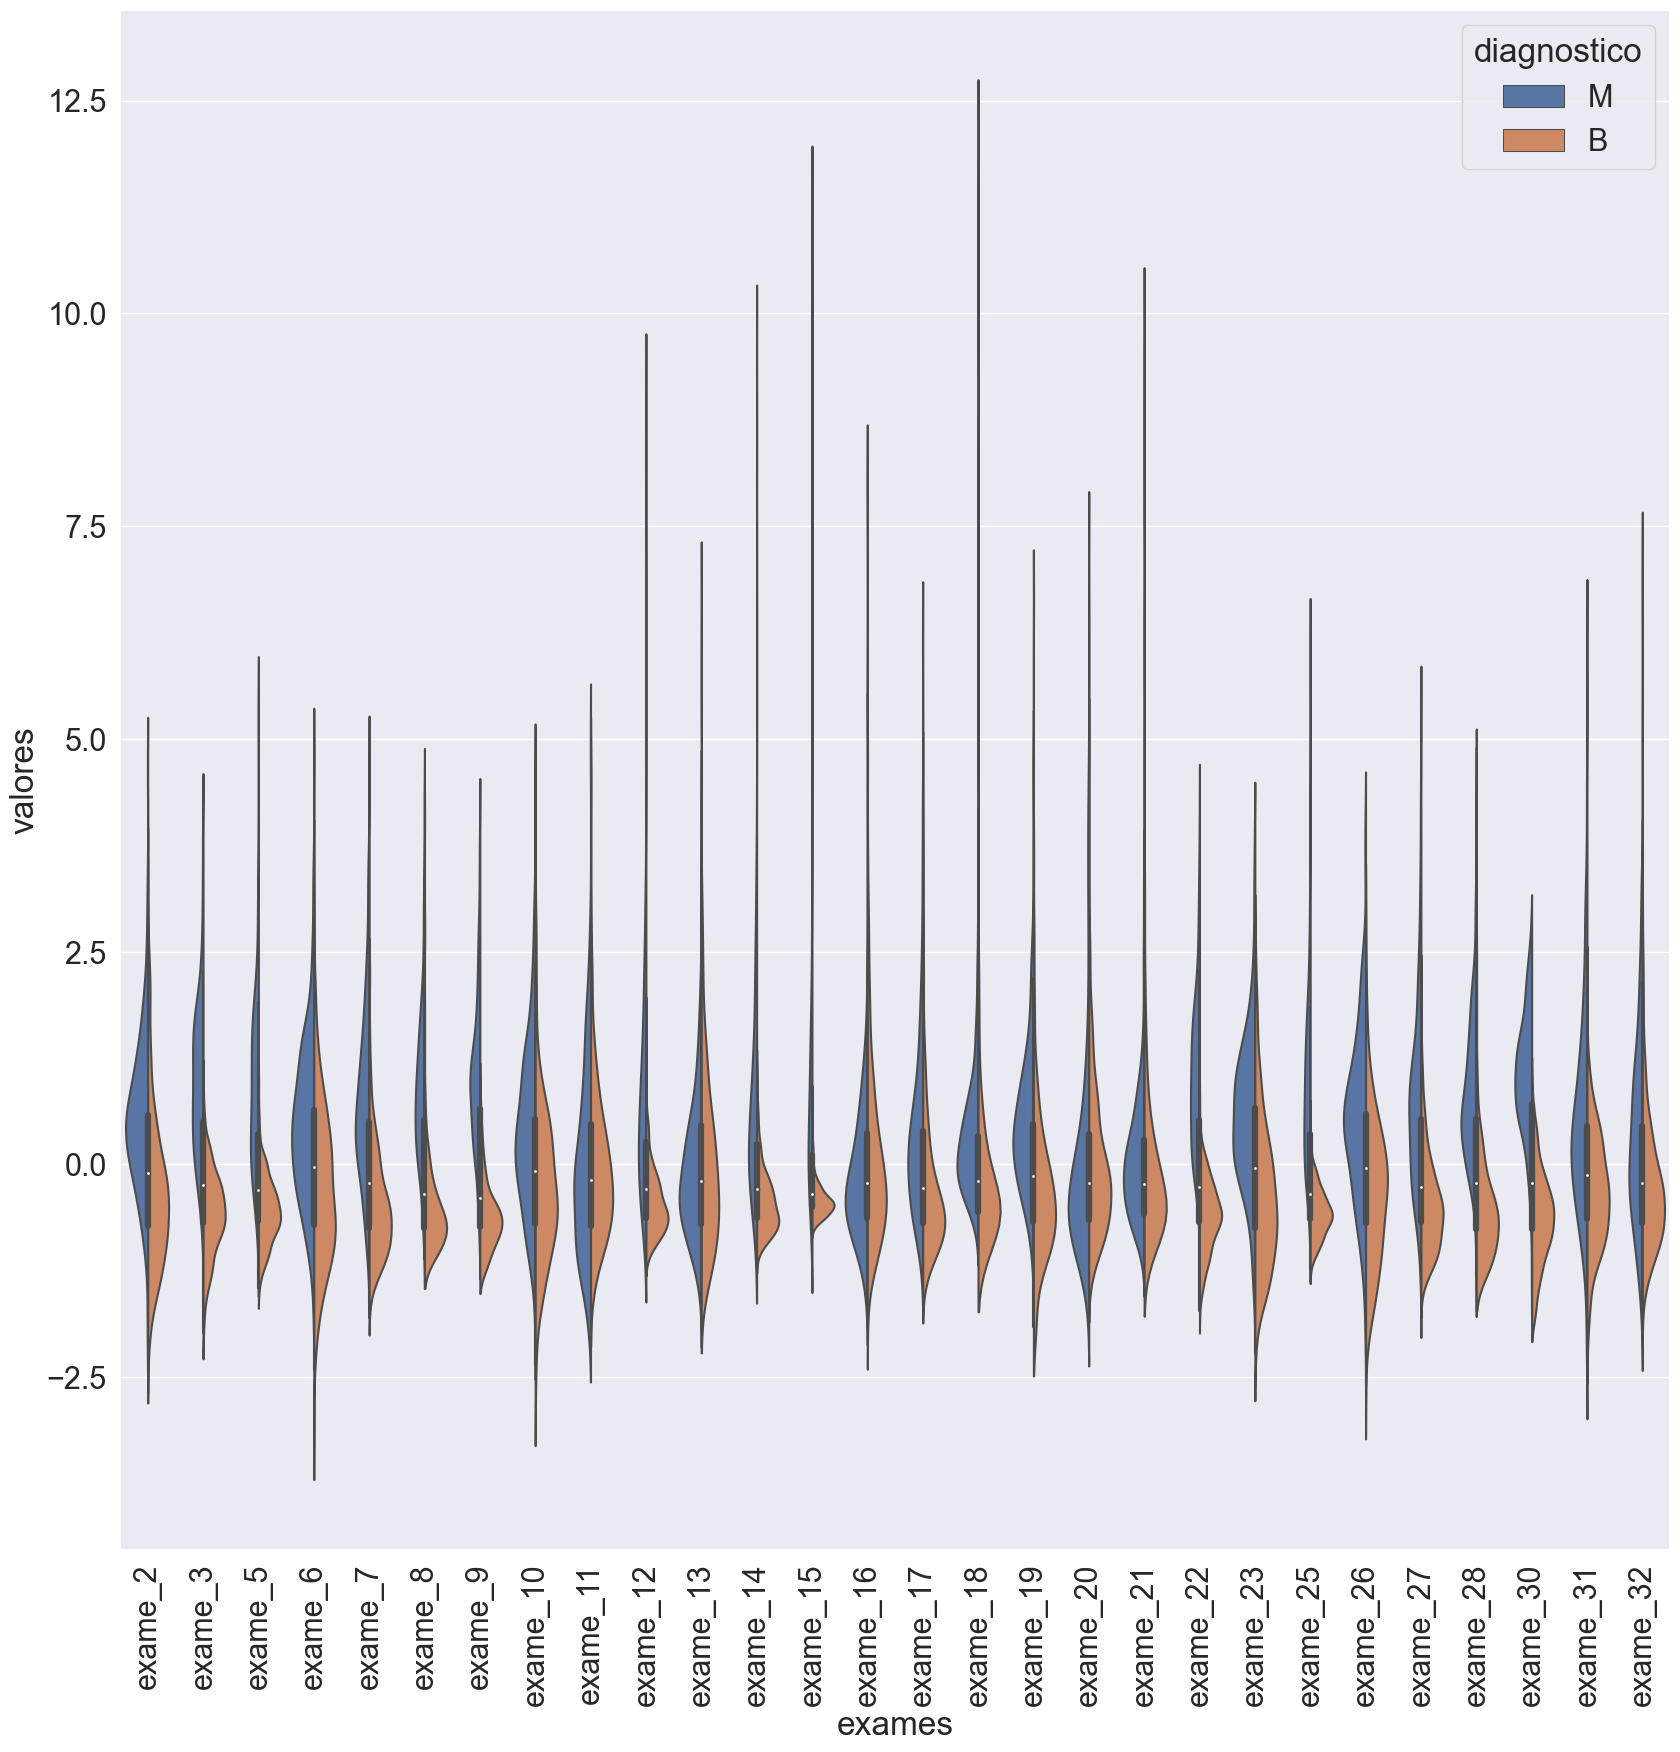

In [121]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20,20))
sns.violinplot(x = 'exames', y = 'valores', hue = 'diagnostico', data = df_plot, split = True)
plt.xticks(rotation = 90)

<AxesSubplot: >

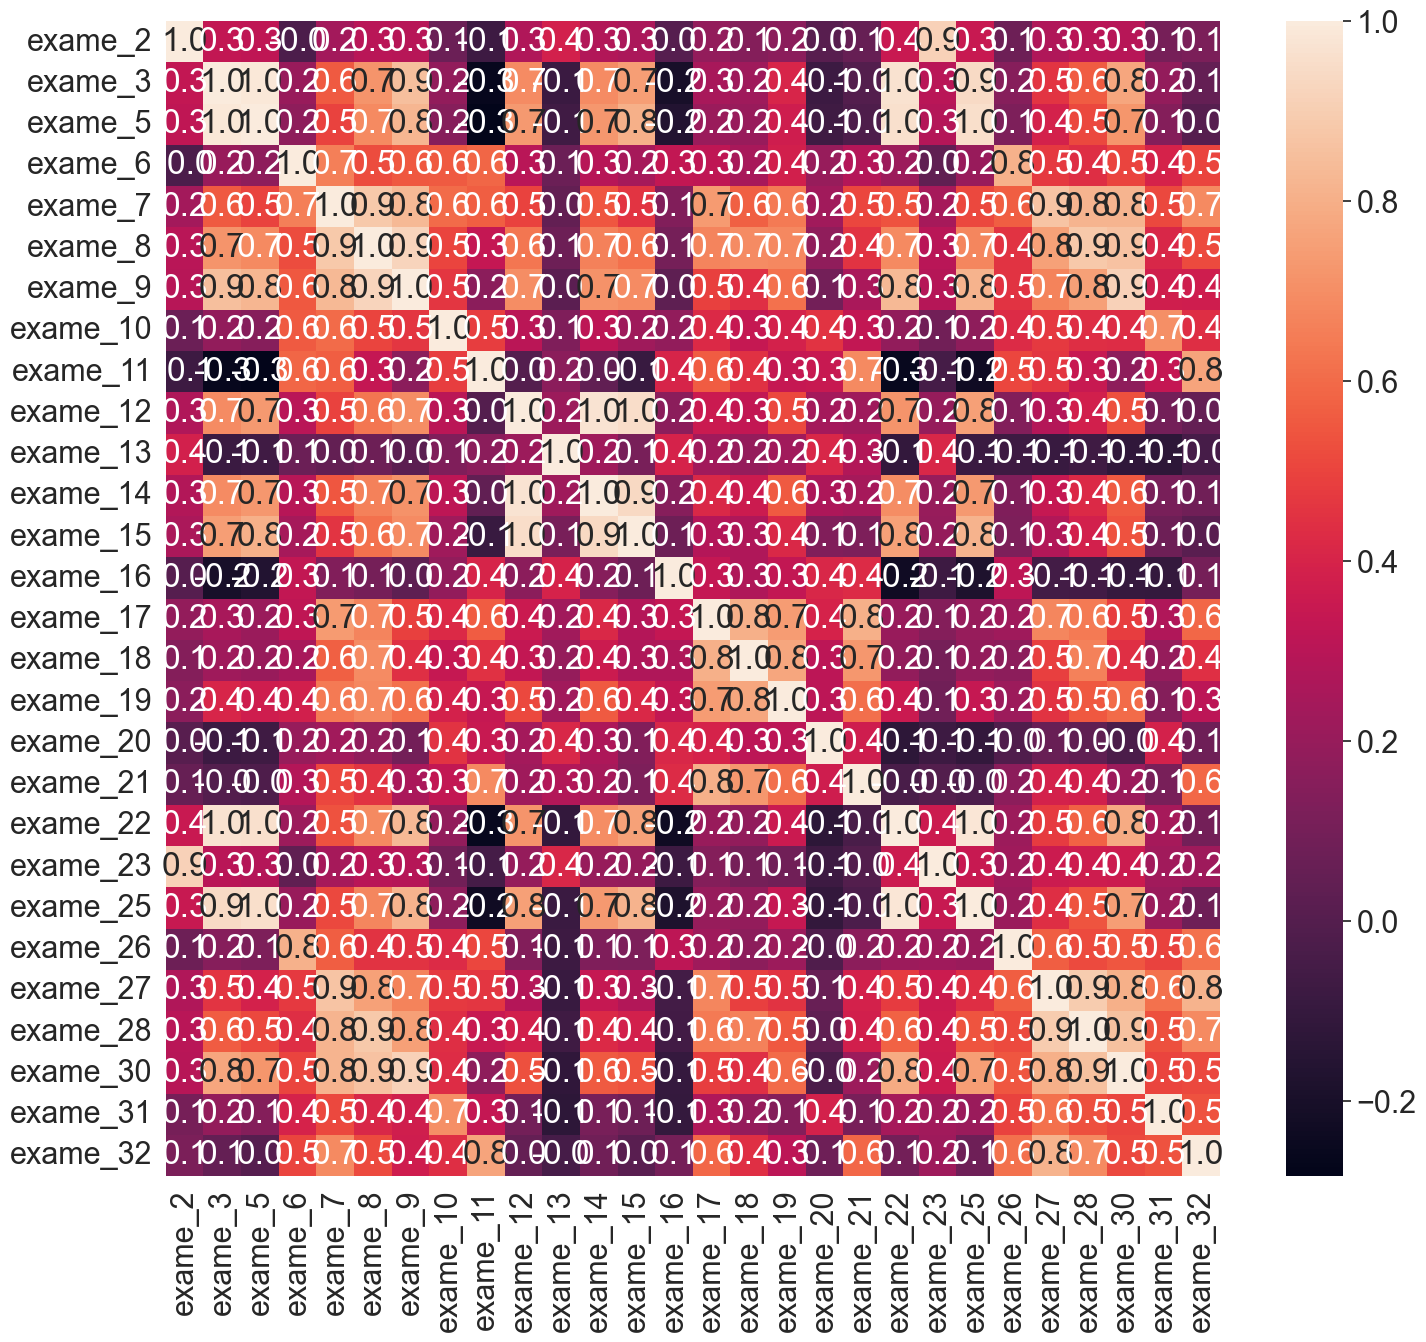

In [122]:
df_corr = X_normalizado.corr()
plt.figure(figsize = (17,15))
sns.heatmap(df_corr, annot = True, fmt = ".1f")

In [123]:
df_corr_ge099 = df_corr[df_corr>0.99]
df_corrge099_sum = df_corr_ge099.sum()

In [124]:
df_corr_g1 = df_corrge099_sum[df_corrge099_sum>1]
df_corr_g1

Series([], dtype: float64)

# Selecting features

In [125]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

kbest = SelectKBest(chi2, k = 5)
kbest


SelectKBest(k=5, score_func=<function chi2 at 0x000001D8FD0E39D0>)

In [126]:
X = df.drop(columns=['id','diagnostico'])
y = df.diagnostico
seed = 42

np.random.seed(seed)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3)


kbest.fit(X_train,y_train)
kbest_train = kbest.transform(X_train)
kbest_test = kbest.transform(X_test)

Acurácia de RFC_kbest : 94.15%
Matriz de confusão RFC_kbest: 
[[105   3]
 [  7  56]]
Precisão RFC_kbest: 
95.0%
Recall RFC_kbest: 
89.0%
f1 score RFC_kbest: 
92.0%


[Text(0.5, 40.249999999999986, 'Predição'), Text(77.25, 0.5, 'Real')]

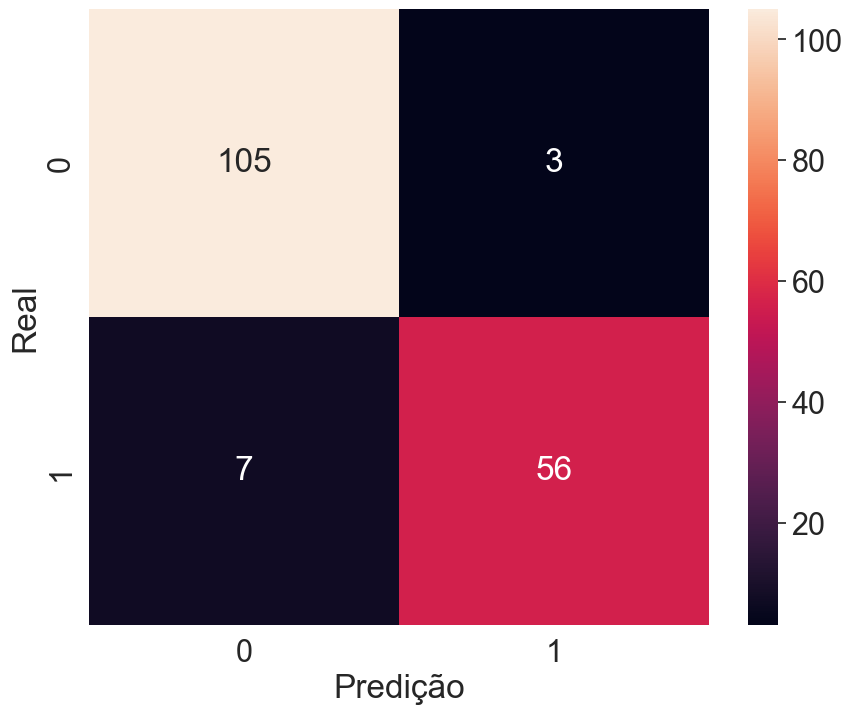

In [127]:
modelo_RFC_kbest  = RandomForestClassifier(n_estimators=100)
modelo_RFC_kbest.fit(kbest_train, y_train)

previsoes_RFC_kbest = modelo_RFC_kbest.predict(kbest_test)
acuracia_RFC_kbest = modelo_RFC_kbest.score(kbest_test,y_test)*100
print(f'Acurácia de RFC_kbest : {round(acuracia_RFC_kbest,2)}%')

from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score

print(f'Matriz de confusão RFC_kbest: ')
print(confusion_matrix(y_test, previsoes_RFC_kbest))

print(f'Precisão RFC_kbest: ')
print(f'{round(precision_score(y_test, previsoes_RFC_kbest, average="binary",pos_label="M" ),2)*100}%')


from sklearn.metrics import recall_score

print(f'Recall RFC_kbest: ')
print(f'{round(recall_score(y_test, previsoes_RFC_kbest, average="binary",pos_label="M" ),2)*100}%')

from sklearn.metrics import f1_score

print(f'f1 score RFC_kbest: ')
print(f'{round(f1_score(y_test, previsoes_RFC_kbest, average="binary",pos_label="M" ),2)*100}%')

plt.figure(figsize = (10, 8))
sns.set(font_scale = 2)
sns.heatmap(confusion_matrix(y_test, previsoes_RFC_kbest), annot = True, fmt = "d").set(xlabel = "Predição", ylabel = "Real")

In [128]:
from sklearn.feature_selection import RFE

selection_rfe = RFE(estimator = modelo_RFC_kbest, n_features_to_select = 5, step = 1)
selection_rfe.fit(X_train,y_train)

RFE(estimator=RandomForestClassifier(), n_features_to_select=5)

Acurácia de RFC_rfe : 95.91%
Matriz de confusão RFC_rfe: 
[[106   2]
 [  5  58]]
Precisão RFC_rfe: 
97.0%
Recall RFC_rfe: 
92.0%
f1 score RFC_rfe: 
94.0%


[Text(0.5, 40.249999999999986, 'Predição'), Text(77.25, 0.5, 'Real')]

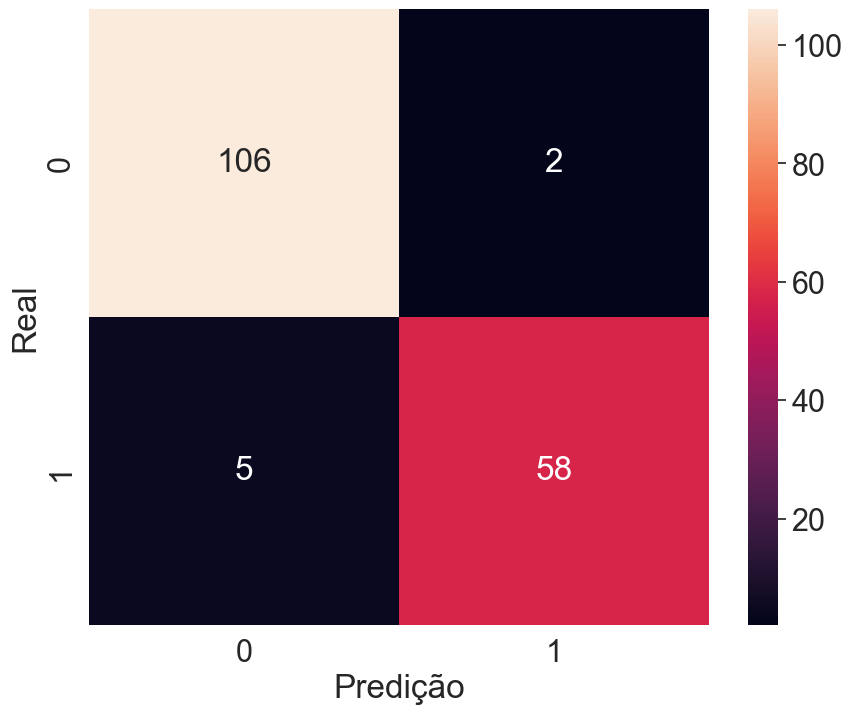

In [129]:
train_rfe = selection_rfe.transform(X_train)
test_rfe = selection_rfe.transform(X_test)
modelo_RFC_kbest.fit(train_rfe, y_train)

previsoes_RFC_rfe= modelo_RFC_kbest.predict(test_rfe)
acuracia_RFC_rfe = modelo_RFC_kbest.score(test_rfe,y_test)*100
print(f'Acurácia de RFC_rfe : {round(acuracia_RFC_rfe,2)}%')

print(f'Matriz de confusão RFC_rfe: ')
print(confusion_matrix(y_test, previsoes_RFC_rfe))

print(f'Precisão RFC_rfe: ')
print(f'{round(precision_score(y_test, previsoes_RFC_rfe, average="binary",pos_label="M" ),2)*100}%')

print(f'Recall RFC_rfe: ')
print(f'{round(recall_score(y_test, previsoes_RFC_rfe, average="binary",pos_label="M" ),2)*100}%')

print(f'f1 score RFC_rfe: ')
print(f'{round(f1_score(y_test, previsoes_RFC_rfe, average="binary",pos_label="M" ),2)*100}%')

plt.figure(figsize = (10, 8))
sns.set(font_scale = 2)
sns.heatmap(confusion_matrix(y_test, previsoes_RFC_rfe), annot = True, fmt = "d").set(xlabel = "Predição", ylabel = "Real")

Resultado da classificação 96.49%


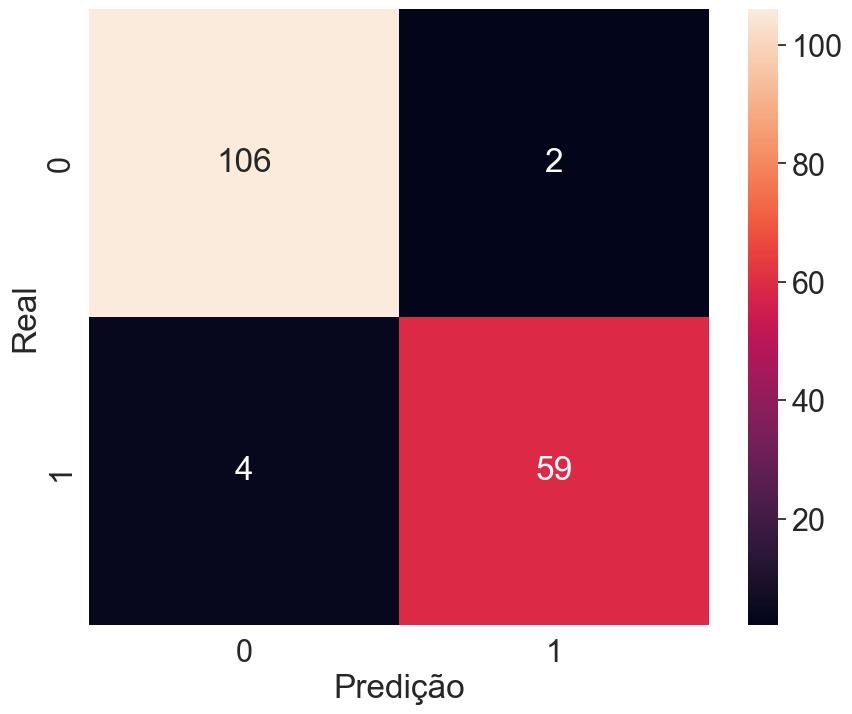

In [143]:
from sklearn.feature_selection import RFECV

SEED = 42
np.random.seed(SEED)



treino_x, teste_x, treino_y, teste_y = train_test_split(X,
                                                       y,
                                                       test_size = 0.3)

classificador = RandomForestClassifier(n_estimators=100, random_state = 42)
classificador.fit(treino_x, treino_y)


selecionador_rfecv = RFECV(estimator = classificador, cv = 5, scoring = "accuracy", step = 1)
selecionador_rfecv.fit(treino_x, treino_y)
treino_rfecv = selecionador_rfecv.transform(treino_x)
teste_rfecv = selecionador_rfecv.transform(teste_x)
classificador.fit(treino_rfecv, treino_y)

matriz_confusao = confusion_matrix(teste_y, classificador.predict(teste_rfecv))
plt.figure(figsize = (10, 8))
sns.set(font_scale = 2)
sns.heatmap(matriz_confusao, annot = True, fmt = "d").set(xlabel = "Predição", ylabel = "Real")

print("Resultado da classificação %.2f%%" % (classificador.score(teste_rfecv, teste_y)* 100))


<function matplotlib.pyplot.show(close=None, block=None)>

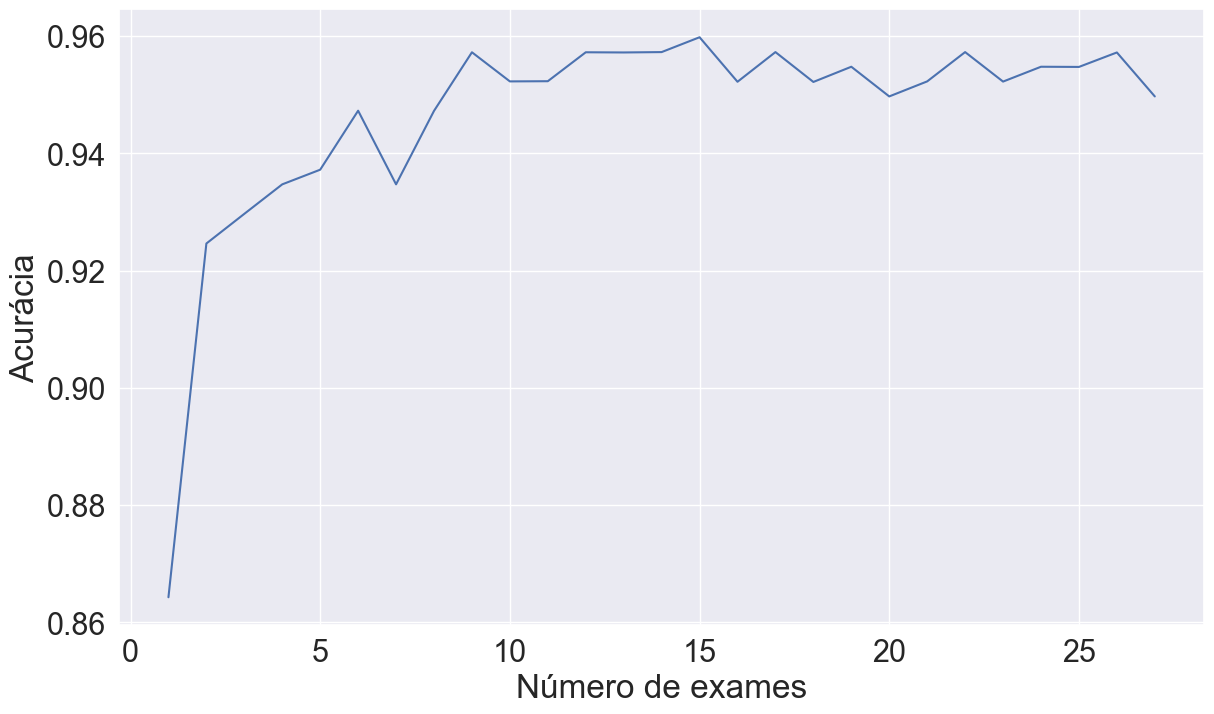

In [145]:
plt.figure(figsize=(14, 8))
plt.xlabel("Número de exames")
plt.ylabel("Acurácia")

plt.plot(range(1, len(selecionador_rfecv.cv_results_['mean_test_score']) + 1), selecionador_rfecv.cv_results_['mean_test_score'])
plt.show

In [148]:
X = df.drop(columns=['id','diagnostico'])


df_modified = selecionador_rfecv.transform(X)

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- exame_3


In [139]:
X

,exame_2,exame_3,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,exame_11,exame_12,...,exame_21,exame_22,exame_23,exame_25,exame_26,exame_27,exame_28,exame_30,exame_31,exame_32
0,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,...,0.006193,25.380,17.33,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,...,0.003532,24.990,23.41,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,...,0.004571,23.570,25.53,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,...,0.009208,14.910,26.50,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,...,0.005115,22.540,16.67,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,...,0.004239,25.450,26.40,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,...,0.002498,23.690,38.25,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,...,0.003892,18.980,34.12,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,...,0.006185,25.740,39.42,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
